In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('loan_data_set.csv')
df = df.dropna(axis=0)
df = df.drop("Loan_ID", axis=1)

d1 = {"Y": 1, "N": 0}
d2 = {"Yes": 1, "No": 0}
d3 = {"Male": 1, "Female": 0}
d4 = {"0": 0, "1": 1, "2": 2, "3+": 3}
d5 = {"Graduate": 1, "Not Graduate": 0}
d6 = {"Rural": 0, "Semiurban": 0.5, "Urban": 1}

cleanup_nums = {"Loan_Status": d1, "Married": d2, "Self_Employed": d2, "Gender": d3,
"Dependents": d4, "Education": d5, "Property_Area": d6}

df.replace(cleanup_nums, inplace=True)


for i in df.columns[1:]:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1.0,0.333333,1.0,0.0,0.054830,0.044567,0.201354,0.729730,1.0,0.0,0.0
2,1,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.096447,0.729730,1.0,1.0,1.0
3,1,1.0,0.000000,0.0,0.0,0.030093,0.069687,0.187817,0.729730,1.0,1.0,1.0
4,1,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.223350,0.729730,1.0,1.0,1.0
5,1,1.0,0.666667,1.0,1.0,0.065145,0.124006,0.436548,0.729730,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,0.000000,1.0,0.0,0.034014,0.000000,0.104907,0.729730,1.0,0.0,1.0
610,1,1.0,1.000000,1.0,0.0,0.048930,0.000000,0.052453,0.324324,1.0,0.0,1.0
611,1,1.0,0.333333,1.0,0.0,0.097984,0.007093,0.412860,0.729730,1.0,1.0,1.0
612,1,1.0,0.666667,1.0,0.0,0.091936,0.000000,0.301184,0.729730,1.0,1.0,1.0


### Loan 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import balanced_accuracy_score
from preprocessing import load_loan_prepr
from tensorflow.random import set_seed

# Import data
X, y, feature_names = load_loan_prepr()
seed = 3012

set_seed(seed) #set TensorFlow seed

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=seed, stratify=y_)

# Initialise neural network
BATCH_SIZE=64
INPUT_SIZE= X_train.shape[1]

model = Sequential()
model.add(InputLayer(INPUT_SIZE))
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.1))
# model.add(Dense(10, activation="relu"))
# model.add(Dropout(0.1))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=1000, validation_data=(X_val, y_val), verbose=1) # validation_split=0.2


5/5 [==============================] - 0s 26ms/step - loss: 0.3768 - accuracy: 0.8081 - val_loss: 0.6665 - val_accuracy: 0.7792
Epoch 502/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.3416 - accuracy: 0.8700 - val_loss: 0.6682 - val_accuracy: 0.7792
Epoch 503/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.3796 - accuracy: 0.8392 - val_loss: 0.6678 - val_accuracy: 0.7792
Epoch 504/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.3735 - accuracy: 0.8318 - val_loss: 0.6683 - val_accuracy: 0.7792
Epoch 505/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.3173 - accuracy: 0.8769 - val_loss: 0.6688 - val_accuracy: 0.7792
Epoch 506/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.3449 - accuracy: 0.8446 - val_loss: 0.6679 - val_accuracy: 0.7792
Epoch 507/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.3232 - accuracy: 0.8787 - val_loss: 0.6672 - val_accuracy: 0.7792
Epoch 508/1000

In [ ]:
def classify(output: np.ndarray):
    return (output > 0.5).astype(int)

predictions = model.predict(X_test)
predictions = np.reshape(predictions, len(y_test))

print(np.min(predictions))
print(np.max(predictions))

predictions = classify(predictions)

8.2988723e-22
0.99997354


In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score

# Calculates the per-class accuracy given predicted and true output labels.
def class_accs(y_pred, y_true):
    acc0 = ((y_pred == y_true) & (y_true == 0)).sum() / (y_true == 0).sum()
    acc1 = ((y_pred == y_true) & (y_true == 1)).sum() / (y_true == 1).sum()
    return acc0, acc1

# Prints a summary of performance metrics given predicted and true output labels.
def print_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    acc0, acc1 = class_accs(y_pred, y_true)
    print(f'F1 = {f1}')
    print(f'Accuracy = {acc}')
    print(f'\tclass 0: {acc0}')
    print(f'\tclass 1: {acc1}')


bal_acc = balanced_accuracy_score(y_test, predictions)
print("Balanced accuracy ({}) = {}".format("neural network", bal_acc))
print_metrics(y_test, predictions)

print(f"Test set size: {len(predictions)}")

print(f"TN: {((predictions == y_test) & (y_test == 0)).sum()}") # TN
print(f"FP: {((predictions != y_test) & (y_test == 0)).sum()}") # FP
print(f"TP: {((predictions == y_test) & (y_test == 1)).sum()}") # TP
print(f"FN: {((predictions != y_test) & (y_test == 1)).sum()}") # FN

Balanced accuracy (neural network) = 0.6863636363636363
F1 = 0.7906976744186046
Accuracy = 0.71875
	class 0: 0.6
	class 1: 0.7727272727272727
Test set size: 96
TN: 18
FP: 12
TP: 51
FN: 15


In [ ]:
# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions
import tensorflow as tf

# Import data
df = pd.read_csv('loan_data_set.csv')

# Drop unnecessary feature
df = df.drop("Loan_ID", axis=1)

# Drop every instance with one or more missing features
df = df.dropna(axis=0)

# Define dictionaries to replace words with numeric values
d1 = {"Y": 1, "N": 0}
d2 = {"Yes": 1, "No": 0}
d3 = {"Male": 1, "Female": 0}
d4 = {"0": 0, "1": 1, "2": 2, "3+": 3}
d5 = {"Graduate": 1, "Not Graduate": 0}
d6 = {"Rural": 0, "Semiurban": 0.5, "Urban": 1}

cleanup_nums = {"Loan_Status": d1, "Married": d2, "Self_Employed": d2, "Gender": d3,
"Dependents": d4, "Education": d5, "Property_Area": d6}

# Replace every word with a corresponding numeric value
df.replace(cleanup_nums, inplace=True)



d = dice_ml.Data(dataframe = df, features=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], continuous_features=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], outcome_name='Loan_Status')


backend = 'TF'+tf.__version__[0]

m = dice_ml.Model(model=model, backend='TF2')

### I have NO idea why this is NOT working, should be according to the documentation...
### It is reading the data in a weird way, no idea why...
exp = dice_ml.Dice(d, m)



query_instance = x_train[1:2]
e1 = exp.generate_counterfactuals(query_instance, total_CFs=10, desired_range=None,
                                  desired_class="opposite",
                                  permitted_range=None, features_to_vary="all")
e1.visualize_as_dataframe(show_only_changes=True)


imp = exp.local_feature_importance(query_instance, posthoc_sparsity_param=None)
print(imp.local_importance)

cobj = exp.global_feature_importance(x_train[0:10], total_CFs=10, posthoc_sparsity_param=None)
print(cobj.summary_importance)


ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape (1, 20)

### Neural network diabetes

In [ ]:
from preprocessing import load_diabetes_prepr


dia_X, dia_y, dia_features = load_diabetes_prepr()


X_dia, X_test_dia, y_dia, y_test_dia = train_test_split(dia_X, dia_y, test_size=0.2, random_state=seed)
X_train_dia, X_val_dia, y_train_dia, y_val_dia = train_test_split(X_dia, y_dia, test_size=0.2, random_state=seed)

# Initialise neural network
BATCH_SIZE=64
INPUT_SIZE= X_train_dia.shape[1]


dia_model = Sequential()
dia_model.add(Input(INPUT_SIZE))
dia_model.add(Dense(20, activation="relu"))
dia_model.add(Dropout(0.1))
# dia_model.add(Dense(10, activation="relu"))
# dia_model.add(Dropout(0.1))
dia_model.add(Dense(10, activation="relu"))
dia_model.add(Dropout(0.1))
dia_model.add(Dense(1))
dia_model.compile(optimizer='adam',
                loss="mean_absolute_error",
                metrics=['mean_squared_error'])


history = dia_model.fit(X_train_dia, y_train_dia, batch_size=BATCH_SIZE, epochs=1000, validation_data=(X_val_dia, y_val_dia)) # validation_split=0.2)


5/5 [==============================] - 0s 46ms/step - loss: 46.0045 - mean_squared_error: 3632.5343 - val_loss: 44.3107 - val_mean_squared_error: 3499.1138
Epoch 502/1000
5/5 [==============================] - 0s 43ms/step - loss: 43.5006 - mean_squared_error: 3308.2776 - val_loss: 44.3097 - val_mean_squared_error: 3505.2764
Epoch 503/1000
5/5 [==============================] - 0s 55ms/step - loss: 44.7724 - mean_squared_error: 3449.5579 - val_loss: 44.3346 - val_mean_squared_error: 3508.6689
Epoch 504/1000
5/5 [==============================] - 0s 45ms/step - loss: 45.2480 - mean_squared_error: 3400.3017 - val_loss: 44.3597 - val_mean_squared_error: 3509.4600
Epoch 505/1000
5/5 [==============================] - 0s 50ms/step - loss: 47.3248 - mean_squared_error: 3863.4636 - val_loss: 44.3660 - val_mean_squared_error: 3509.3872
Epoch 506/1000
5/5 [==============================] - 0s 63ms/step - loss: 43.1359 - mean_squared_error: 3297.5320 - val_loss: 44.3412 - val_mean_squared_error:

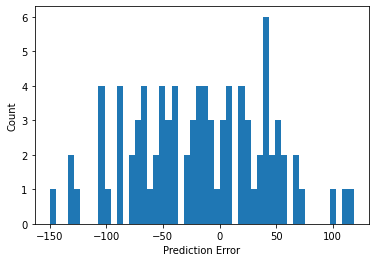

In [ ]:
test_predictions = dia_model.predict(X_test_dia)
test_predictions = np.reshape(test_predictions, len(y_test_dia))



error = test_predictions - y_test_dia
plt.hist(error, bins=50)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

### Breast cancer

In [ ]:

from preprocessing import load_wisconsin_prepr


breast_X, breast_y, breast_features = load_wisconsin_prepr()


X_breast, X_test_breast, y_breast, y_test_breast = train_test_split(breast_X, breast_y, test_size=0.2, random_state=seed)
X_train_breast, X_val_breast, y_train_breast, y_val_breast = train_test_split(X_breast, y_breast, test_size=0.2, random_state=seed)

# Initialise neural network
BATCH_SIZE=64
INPUT_SIZE= X_train_breast.shape[1]



breast_model = Sequential()
breast_model.add(Input(INPUT_SIZE))
breast_model.add(Dense(20, activation="relu"))
breast_model.add(Dropout(0.1))
breast_model.add(Dense(10, activation="relu"))
breast_model.add(Dropout(0.1))
breast_model.add(Dense(5, activation="relu"))
breast_model.add(Dropout(0.1))
breast_model.add(Dense(1, activation="sigmoid"))
breast_model.compile(optimizer='adam',
                loss="binary_crossentropy",
                metrics=['accuracy'])

breast_model.fit(X_train_breast, y_train_breast, batch_size=BATCH_SIZE, epochs=200, validation_data=(X_val_breast, y_val_breast)) # validation_split=0.2)




Epoch 1/200
6/6 [==============================] - 3s 217ms/step - loss: 0.6587 - accuracy: 0.6263 - val_loss: 0.5989 - val_accuracy: 0.7692
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 0.6081 - accuracy: 0.7159 - val_loss: 0.5537 - val_accuracy: 0.8242
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5701 - accuracy: 0.7440 - val_loss: 0.5103 - val_accuracy: 0.8462
Epoch 4/200
6/6 [==============================] - 0s 25ms/step - loss: 0.5347 - accuracy: 0.7745 - val_loss: 0.4651 - val_accuracy: 0.8791
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.5015 - accuracy: 0.8159 - val_loss: 0.4210 - val_accuracy: 0.9011
Epoch 6/200
6/6 [==============================] - 0s 19ms/step - loss: 0.4425 - accuracy: 0.8603 - val_loss: 0.3777 - val_accuracy: 0.9121
Epoch 7/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4413 - accuracy: 0.8323 - val_loss: 0.3388 - val_accuracy: 0.9341
Epoch 8/200
6/6 [==

In [ ]:
breast_predictions = breast_model.predict(X_test_breast)
breast_predictions = np.reshape(breast_predictions, len(y_test_breast))

print(np.min(breast_predictions))
print(np.max(breast_predictions))

breast_predictions = classify(breast_predictions)


breast_bal_acc = balanced_accuracy_score(y_test_breast, breast_predictions)
print("Balanced accuracy ({}) = {}".format("neural network", breast_bal_acc))
print_metrics(y_test_breast, breast_predictions)

print(f"Test set size: {len(breast_predictions)}")

print(f"TN: {((breast_predictions == y_test_breast) & (y_test_breast == 0)).sum()}") # TN
print(f"FP: {((breast_predictions != y_test_breast) & (y_test_breast == 0)).sum()}") # FP
print(f"TP: {((breast_predictions == y_test_breast) & (y_test_breast == 1)).sum()}") # TP
print(f"FN: {((breast_predictions != y_test_breast) & (y_test_breast == 1)).sum()}") # FN

7.670484e-31
1.0
Balanced accuracy (neural network) = 0.9635549872122762
F1 = 0.9705882352941176
Accuracy = 0.9649122807017544
	class 0: 0.9565217391304348
	class 1: 0.9705882352941176
Test set size: 114
TN: 44
FP: 2
TP: 66
FN: 2


### Bikes

In [ ]:
def load_bikes_prepr():
    df = pd.read_csv('./datasets/hour.csv')
    df = df.drop(["instant", "dteday", "casual", "registered"], axis=1)

    # Convert everything to a NumPy array
    X = df.values[:,:-1]
    y = df.values[:,-1]
    feature_names = df.columns[:-1]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, feature_names

bikes_X, bikes_y, bikes_features = load_bikes_prepr()


X_bikes, X_test_bikes, y_bikes, y_test_bikes = train_test_split(bikes_X, bikes_y, test_size=0.2, random_state=seed)
X_train_bikes, X_val_bikes, y_train_bikes, y_val_bikes = train_test_split(X_bikes, y_bikes, test_size=0.2, random_state=seed)

# Initialise neural network
BATCH_SIZE=64
INPUT_SIZE= X_train_bikes.shape[1]



bikes_model = Sequential()
bikes_model.add(Input(INPUT_SIZE))
bikes_model.add(Dense(30, activation="relu"))
bikes_model.add(Dropout(0.1))
bikes_model.add(Dense(15, activation="relu"))
bikes_model.add(Dropout(0.1))
bikes_model.add(Dense(5, activation="relu"))
bikes_model.add(Dropout(0.1))
bikes_model.add(Dense(1))
bikes_model.compile(optimizer='adam',
                loss="mean_absolute_error",
                metrics=['mean_squared_error'])

bikes_model.fit(X_train_bikes, y_train_bikes, batch_size=BATCH_SIZE, epochs=200, validation_data=(X_val_bikes, y_val_bikes)) # validation_split=0.2)




Epoch 1/200
174/174 [==============================] - 1s 3ms/step - loss: 184.8367 - mean_squared_error: 66906.0743 - val_loss: 139.4370 - val_mean_squared_error: 42622.9570
Epoch 2/200
174/174 [==============================] - 0s 2ms/step - loss: 127.4869 - mean_squared_error: 36406.2066 - val_loss: 96.1107 - val_mean_squared_error: 19710.5039
Epoch 3/200
174/174 [==============================] - 0s 2ms/step - loss: 106.5473 - mean_squared_error: 24244.8407 - val_loss: 94.1988 - val_mean_squared_error: 19247.6777
Epoch 4/200
174/174 [==============================] - 0s 2ms/step - loss: 106.1921 - mean_squared_error: 24347.2796 - val_loss: 93.5783 - val_mean_squared_error: 19661.5020
Epoch 5/200
174/174 [==============================] - 0s 2ms/step - loss: 102.2816 - mean_squared_error: 23300.7956 - val_loss: 92.9179 - val_mean_squared_error: 19131.3477
Epoch 6/200
174/174 [==============================] - 0s 2ms/step - loss: 103.9176 - mean_squared_error: 24264.5240 - val_loss: 

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


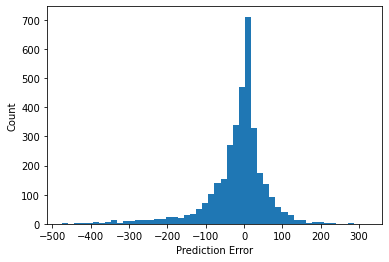

In [ ]:

bikes_predictions = bikes_model.predict(X_test_bikes)
bikes_predictions = np.reshape(bikes_predictions, len(y_test_bikes))



bikes_error = bikes_predictions - y_test_bikes
plt.hist(bikes_error, bins=50)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

"""
tmp_df = pd.read_csv('./datasets/hour.csv')
tmp_df = tmp_df.drop(["instant", "dteday", "casual", "registered"], axis=1)

all_bikes_features = tmp_df.columns

test_results = {}
test_results["bikes_model"] = bikes_model.evaluate(X_test_bikes, y_test_bikes, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error']).T
"""


#from tensorflow.keras.utils import plot_model
#plot_model(bikes_model, "multi_input_and_output_model.png", show_shapes=True)

NameError: name 'X_train' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90a57419-7b7b-4aa4-8a97-858f9f98a849' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>